# Fourier-Reihe einer Rechteckschwingung #
Dieses Notebook demonstriert den grundsätzlichen Aufbau von Jupyter (IPyton) Notebooks mit interaktiven Widgets am Beispiel der Fourierreihe einer Rechteckschwingung. Das Notebook besteht aus sog. Zellen, die Text (formatiert als Markdown oder Latex) oder ausführbaren Python-Code enthalten.

#### Hinweise: ####

- Editieren mit Doppelklick in eine Zelle

- `<RETURN>` fügt einen Zeilenumbruch ein.

- `<SHIFT>-<RETURN>` in einer einzelnen Zelle beendet den Editiermodus und stellt die Zelle dar (Text-Zelle) bzw. führt sie aus (Code-Zelle) 

- Mit `Cell -> Run All` werden alle Zellen nacheinander initialisiert bzw. ausgeführt.

Kurzeinführung in Jupyter: [Einführung Fauchereau](http://nbviewer.jupyter.org/github/nicolasfauchereau/Python_NIWA_Wellington/blob/master/notebooks/IPython_notebook.html)

In [2]:
# Die hier importierten Module und die hier definierten Einstellungen können in den folgenden Zellen verwendet werden
#%matplotlib inline
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
    
import matplotlib.pyplot as plt
from numpy import pi,sin,linspace,zeros,arange,cos
from ipywidgets import interact
from IPython.display import HTML, YouTubeVideo

#plt.style.use('seaborn-whitegrid') # ('classic')#('seaborn-dark')
#print(plt.style.available) # alle Matplotlib styles
import dsp_fpga_lib as dsp
plt.rcParams.update(dsp.mpl_rc) # define plot properties 
plt.rcParams['figure.figsize'] = (10.0, 3.0) # Plotgröße in Inch
figsize = {"figsize": (12,5), "facecolor":"w"}

## Fourier

Die Fourierreihe für eine symmetrische Rechteckschwingung mit Amplitude 1 und Periode $T$ ist

$$s(t) = \frac{4}{\pi} \sum^\infty_{k=1} \frac{\sin \left((2k -1)2\pi t / T\right)}{2k-1} $$

Im Folgenden wird die Reihe mit einer endlichen Anzahl $N$ Termen dargestellt.

In [3]:
def square_wave(N=3, T=5, n_points=200):
    """Berechne und plotte die Fourierreihe mit N Termen für eine Rechteckschwingung mit Periode T und Amplitude 1."""
    t = linspace(-4*pi, 4*pi, n_points)
    s = zeros(n_points)
    for k in arange(1, N+1, 2): # start, stop (exklusive letztes Element), step
        s = s + (1./k * sin(2*pi*k*t/T))
    s = s * 4.0 / pi
    fig,ax = plt.subplots(**figsize)
    ax.plot(t, s)

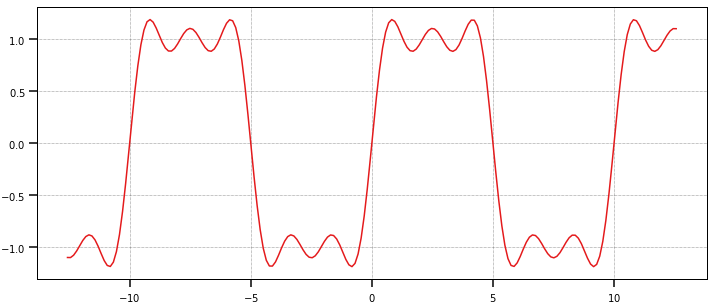

In [4]:
square_wave(N=5,T=10)

### Einfache interaktive Widgets ###
`interact()` generiert für jeden Parameter der übergebenen Funktion automatisch einen Slider. Wertebereich und Schrittweite können optional angegeben werden. Abhängig vom übergebenen Typ werden IntSlider, FloatSlider etc. erzeugt.

Jedesmal wenn ein Slider geändert wird, wird die Funktion `square_wave()` mit dem aktualisierten Parameter berechnet. Wird das Keyword Argument `continuous_update=False` gesetzt, erfolgt die Aktualisierung nur noch wenn die Maus losgelassen wird. 

Das Semikolon am Ende der Anweisung unterdrückt (wie bei Matlab) Ausgaben der Funktion (nur in Notebooks, nicht bei Standard-Python).

Mehr Informationen zu `interact()` unter
http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

In [5]:
interact(square_wave, N=(1,50,2), T=(1., 50), n_points=(1, 500), continuous_update=False);

interactive(children=(IntSlider(value=3, description='N', max=50, min=1, step=2), FloatSlider(value=5.0, descr…

### Debugging ###
Tauchen keine interaktiven Widgets auf und wird im Terminal die Fehlermeldung 

`[IPKernelApp] ERROR | No such comm target registered: ipython.widget`

ausgegeben, sollte man die Pakete `ipywidgets` und u.U. `widgetsnbextension` nachinstallieren:

`conda install ipywidgets`

`conda install widgetsnbextension`

Ggf. muss noch

`jupyter nbextension enable --py widgetsnbextension`

vom Terminal aus aktiviert werden (nur lokal bzw. für Betreuer, sudo Berechtigung erforderlich, siehe [Issue 541](https://github.com/jupyter-widgets/ipywidgets/issues/541)).

**Achtung:** Unter Jupyterlab gibt es größere Probleme mit interaktiven Widgets!

## Videos ##
Zusätzlich können Sie sich Videos zum Thema anschauen, z.B.

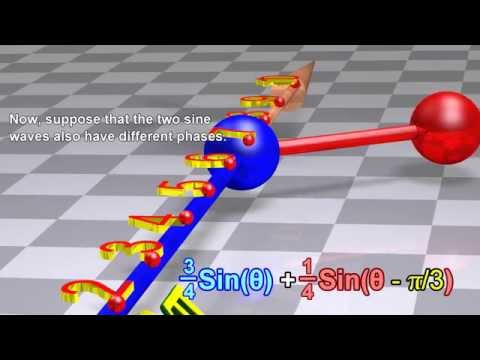

In [6]:
# Video "Fourier Transform, Fourier Series and Frequency Spectrum" von Eugene Khutoryansky
YouTubeVideo("r18Gi8lSkfM", start=0, autoplay=0, theme="light", color="red")# , width=800 , height=450)
# HTML('<iframe width="600" height="350" src="https://youtube.com/embed/r18Gi8lSkfM" </iframe>')

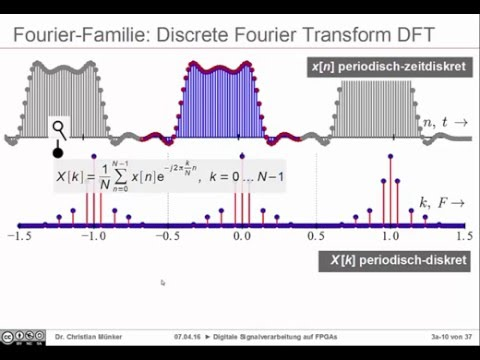

In [7]:
YouTubeVideo("zj26G_t45yQ") # Münker 3-1 DFT

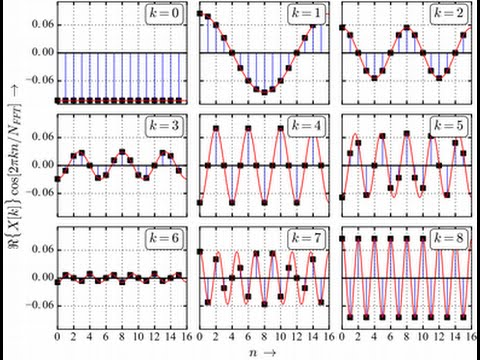

In [8]:
YouTubeVideo("9Nq228cF4nw") # Münker 3-2 DFT

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2017*.

The latest version of this notebook can be found at

[https://github.com/chipmuenk/dsp_fpga/blob/master/notebooks//03_DFT/Fourier Series.ipynb](https://github.com/chipmuenk/dsp_fpga/blob/master/notebooks//03_DFT/Fourier Series.ipynb)